# Analyzing newsletter urls

---

In [5]:
%matplotlib inline

# Imports

import re
import os
import json
import pprint
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variables

pp = pprint.PrettyPrinter(indent=4)

# Read data

data = []
with open('./emails.json') as input_file:
    for line in input_file:
        data.append(json.loads(line))

In [6]:
df = pd.DataFrame(data)

In [47]:
print "Number of emails downloaded:",df.shape[0]

Number of emails downloaded: 369


In [8]:
df.head(3)

,date,from,subject,to,urls
0,"Mon, 18 Jan 2016 19:01:07 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Hola,bluecapglobal@bluecap.com,NaN
1,"Mon, 14 Mar 2016 11:01:06 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,"[mailto:carlo.gonzalez@bbva.com, tel:%2B34%209..."
2,"Tue, 15 Mar 2016 09:27:09 +0100",Laia Izquierdo <lizquierdo@bluecap.com>,Bluecap banking breakfast,bluecapglobal@bluecap.com,NaN


In [9]:
df.groupby('subject').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"}).head(5)

,subject,count
0,Bluecap Banking Breakfast,309
1,Bluecap banking breakfast,33
2,Bluecap Banking Brunch,10
3,Bluecap Banking Lunch,2
4,Bluecap Banking Breakfast + Benchmark de moros...,1


In [48]:
# Extract all article urls

urls = []

for idx, row in df.iterrows():
    if row['urls']:
        try:
            for url in row['urls']:
                urls.append(url)
        except:
            print idx, row['urls']
            pass

0 nan
2 nan
3 nan
4 nan
7 nan


In [11]:
# Delete possible dups
urls = list(set(urls))

In [12]:
df_urls = pd.DataFrame(urls).rename(columns={0:"url"})
df_urls.head(5)

,url
0,http://www.expansion.com/empresas/banca/2018/0...
1,http://www.expansion.com/ahorro/2018/03/09/5aa...
2,http://www.expansion.com/empresas/banca/2017/0...
3,http://www.expansion.com/empresas/banca/2017/1...
4,http://www.expansion.com/empresas/banca/2016/0...


In [13]:
df_urls['source'] = df_urls['url'].apply(lambda x: re.findall('(?:\/\/www\.|\/\/)(\w+)\.\w',x))
df_urls.head(5)

,url,source
0,http://www.expansion.com/empresas/banca/2018/0...,[expansion]
1,http://www.expansion.com/ahorro/2018/03/09/5aa...,[expansion]
2,http://www.expansion.com/empresas/banca/2017/0...,[expansion]
3,http://www.expansion.com/empresas/banca/2017/1...,[expansion]
4,http://www.expansion.com/empresas/banca/2016/0...,[expansion]


In [14]:
for idx, row in df_urls.iterrows():
    source = row['source']
    try:
        df_urls.loc[idx, 'source'] = source[0]
    except:
        df_urls.loc[idx, 'source'] = ""

In [15]:
source = df_urls.groupby('source').size().sort_values(0, ascending=False).reset_index().rename(columns={0:"count"})
source.head(10)

,source,count
0,expansion,2303
1,cincodias,1140
2,elconfidencial,763
3,bernsteinresearch,71
4,blogs,31
5,retina,13
6,,12
7,federalreserve,9
8,economia,6
9,bloomberg,3


In [49]:
print "Number of different urls extracted:", df_urls.shape[0]

Number of different urls extracted: 4413


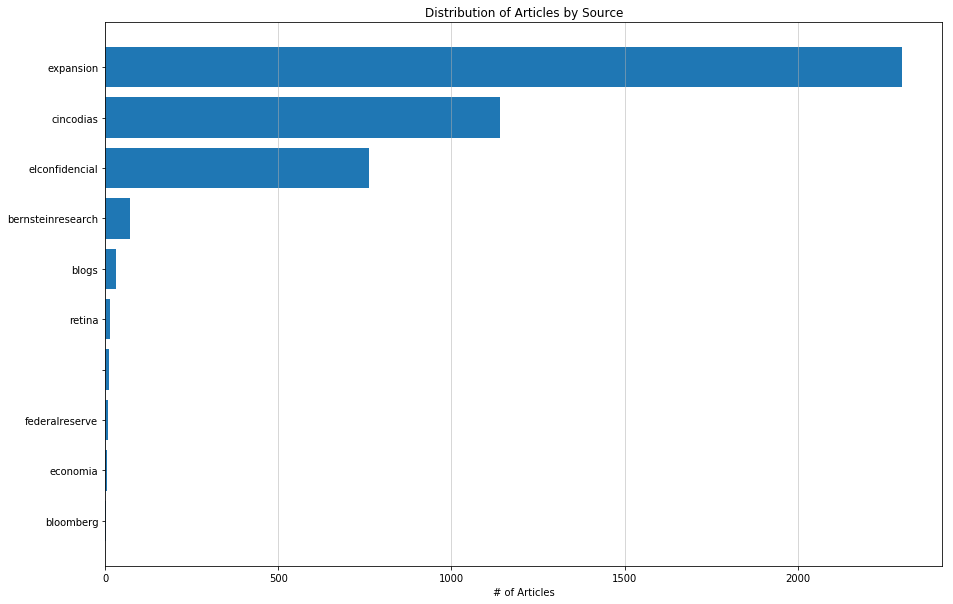

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))

y_pos = np.arange(len(list(source['source'])[:10]))

ax.barh(y_pos, list(source['count'])[:10], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(source['source'])[:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of Articles')
ax.set_title('Distribution of Articles by Source')
ax.xaxis.grid(which='major', linewidth=0.5)

plt.show()

In [18]:
# let's check that urls are properly extracted ...

df_urls['url_length'] = df_urls['url'].apply(lambda x: len(x))

In [19]:
df_urls.sort_values('url_length').head(20)

,url,source,url_length
2103,https://cincodia,,16
275,http://macauhub.com,macauhub,19
2445,http://somosmuno.com,somosmuno,20
2294,http://salesforce.com,salesforce,21
1616,tel:607%2069%2033%2071,,22
715,http://www.bluecap.com/,bluecap,23
197,mailto:ventasrv@bbva.com,,24
359,http://www.aknowledge.us/,aknowledge,25
4161,http://www.expansion.com/,expansion,25
1985,mailto:pschulz@bluecap.com,,26


In [39]:
# There are a few <a> tags that do not contain urls (telephones, mailto, ...)
# We will only consider those urls with 'http' string

df_urls['valid_url'] = df_urls['url'].apply(lambda x: 'http' in x)

In [41]:
df_urls.sort_values('url_length').head(20)

,url,source,url_length,valid_url
2103,https://cincodia,,16,True
275,http://macauhub.com,macauhub,19,True
2445,http://somosmuno.com,somosmuno,20,True
2294,http://salesforce.com,salesforce,21,True
1616,tel:607%2069%2033%2071,,22,False
715,http://www.bluecap.com/,bluecap,23,True
197,mailto:ventasrv@bbva.com,,24,False
359,http://www.aknowledge.us/,aknowledge,25,True
4161,http://www.expansion.com/,expansion,25,True
1985,mailto:pschulz@bluecap.com,,26,False


In [42]:
# There are a few urls (#2103, #2163, ...) that we would like to get rid off eventhough they contain 'http'

In [46]:
print "There are roughly", df_urls[df_urls['valid_url']==True].shape[0], "valid urls"

There are roughly 4402 valid urls


# Conclusions

* We will modify the email download script to not include invalid urls